# **Install Library**

In [ ]:
!pip install geopy

# **Import LIbrary**

In [ ]:
### import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import requests
import zipfile
import io
from geopy.geocoders import Nominatim

In [ ]:
from google.colab import drive  # Tambahkan ini

# Mount Google Drive
drive.mount('/content/drive')

import requests
import zipfile
import io
import pandas as pd

# URL raw GitHub dari file zip
zip_path = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/SpatialAnalysis/spatial1.zip"
# Load shapefile data
#dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kriminal/LAPD_Reporting_Districts.shp"
#csv_path = "https://media.githubusercontent.com/media/arifadli/DatasetRepository/main/Kriminal/Crime_Data_2010_2017.csv"

# Mengunduh file zip dari URL
response = requests.get(zip_path)

# Mengekstrak isi file zip
with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall()

# Baca file CSV yang sudah diekstrak
csv_file = "spatial1.csv"
data = pd.read_csv(csv_file)

# Lokasi di Google Drive untuk menyimpan file CSV
drive_csv_file = '/content/drive/MyDrive/models/spatial1.csv'

# Menyimpan file CSV ke Google Drive
data.to_csv(drive_csv_file, index=False)

# Lakukan sesuatu dengan data yang sudah dibaca
data.head()


Mounted at /content/drive


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
type(data) ## ie above "data" belongs to dataframe data-structure

pandas.core.frame.DataFrame

In [ ]:
data.columns ## getting all the columns of dataframe

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
data.shape ## getting dimensions of dataframe ..

(51717, 17)

# **Data Preprocessing**

In [ ]:
data.duplicated().sum() ## 0 duplicated entries

0

In [ ]:
data.isnull().sum() ## getting total missing values in every feature of dataframe

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
### As we have few missing values in location feature ,then we can drop that..

data.dropna(subset=['location'] , inplace = True)

In [ ]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7754
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [ ]:
df = data.copy() ## creating copy of "data" into "df" ,so that whatever manipulations we will do , we will do on top of df

In [ ]:
df['location'] = df['location'] + ' , Bangalore , Karnataka , India'

In [ ]:
df['location']

0             Banashankari , Bangalore , Karnataka , India
1             Banashankari , Bangalore , Karnataka , India
2             Banashankari , Bangalore , Karnataka , India
3             Banashankari , Bangalore , Karnataka , India
4             Basavanagudi , Bangalore , Karnataka , India
                               ...                        
51712           Whitefield , Bangalore , Karnataka , India
51713           Whitefield , Bangalore , Karnataka , India
51714           Whitefield , Bangalore , Karnataka , India
51715    ITPL Main Road, Whitefield , Bangalore , Karna...
51716    ITPL Main Road, Whitefield , Bangalore , Karna...
Name: location, Length: 51696, dtype: object

In [ ]:
df.dtypes ## various data-types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

# **Get Latitudes & longitudes**

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
rest_loc = pd.DataFrame() ## creating dataframe of all the unique locations of Bengalore

In [ ]:
rest_loc['Name'] = df['location'].unique()

In [ ]:
rest_loc

,Name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , I..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [ ]:
geolocator = Nominatim(user_agent="app" , timeout=None ) ## set timeout=None to get rid of timeout error

In [ ]:
lat = [] ## define lat list to store all the latitudes
lon = [] ## define lon list to store all the longitudes


for name in rest_loc['Name']:
    location = geolocator.geocode(name)

    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)

    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [ ]:
print(lat)

[12.8849238, 12.9417261, 12.9467026, 12.9292731, 12.9067683, 12.9274413, 12.9660722, 12.9055682, 12.9096941, 12.93060265, 12.965717999999999, 12.95212575, 12.9366292, 12.911275849999999, 12.9308245, 12.9089453, 12.9855509, 12.848759900000001, 12.9116225, 12.9552572, 12.9244812, 12.9489339, 12.9575547, 12.9348429, 12.9408685, 12.9670911, 12.9364846, 13.0394104, 12.9327778, 12.93103185, 12.9696365, 13.001147, 12.9572041, 12.9732913, 12.9277245, 12.9986827, 13.0227204, 12.9755264, 12.9714852, 12.9683054, 12.9755105, 12.9778793, 12.9661558, 12.986391, 12.9821293, 12.9744255, 12.9883587, 12.9844722, 12.9822324, 12.9934283, 13.0358698, 12.9624669, 12.945245, 12.9678074, 13.0263229, 13.0027353, 12.9931876, 13.0093455, 12.9390255, 12.9783547, 12.957998, 12.97339325, 12.9578658, 12.96381425, 12.9874878, 12.9621761, 13.007516, 12.9243692, 12.9282918, 12.9340114, 12.9467972, 12.9882338, 13.0141618, 12.9817233, 13.0422794, 13.0258087, 13.0221416, 13.0356738, 13.0784743, nan, 12.973936, 12.9846713,

In [ ]:
rest_loc['lat'] = lat
rest_loc['lon'] = lon

In [ ]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.884924,77.515485
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [ ]:
rest_loc.isnull().sum() ## checking missing values in a rest_loc dataframe..

Name    0
lat     2
lon     2
dtype: int64

In [ ]:
rest_loc['lat'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
88    False
89    False
90    False
91    False
92    False
Name: lat, Length: 93, dtype: bool

In [ ]:
rest_loc[rest_loc['lat'].isnull()]

,Name,lat,lon
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [ ]:
rest_loc['lat'][45] = 12.9764122

<ipython-input-30-fd99f6ab2c95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_loc['lat'][45] = 12.9764122


In [ ]:
rest_loc['lat'][45]

12.9764122

In [ ]:
rest_loc['lon'][45]  =77.6017437

<ipython-input-32-cf4f417af57d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_loc['lon'][45]  =77.6017437


In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
rest_loc['lat'][79] = 13.0163
rest_loc['lon'][79] = 77.6785

In [ ]:
rest_loc['lat'][85] = 13.0068
rest_loc['lon'][85] = 77.5813

In [ ]:
rest_loc.isnull().sum()

Name    0
lat     0
lon     0
dtype: int64

In [ ]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
geolocator = Nominatim(user_agent="app" , timeout=None )

In [ ]:
df['address'][0]

'942, 21st Main Road, 2nd Stage, Banashankari, Bangalore'

In [ ]:
loc = geolocator.geocode(df['address'][0])

In [ ]:
hasattr(loc , 'latitude')

True

In [ ]:
address = {'street':'21st Main Road' , 'city':'Bangalore' , 'country':'India' , 'state':'Karnataka'}

In [ ]:
address_geocode = geolocator.geocode(address)

In [ ]:
hasattr(address_geocode , 'latitude')

True

In [ ]:
hasattr(address_geocode , 'longitude')

True

In [ ]:
address_geocode.latitude

12.9216455

In [ ]:
address_geocode.longitude

77.5910418

# **The largest number of restaurants in Bangalore**

In [ ]:
df['location'].value_counts()

location
BTM , Bangalore , Karnataka , India                      5124
HSR , Bangalore , Karnataka , India                      2523
Koramangala 5th Block , Bangalore , Karnataka , India    2504
JP Nagar , Bangalore , Karnataka , India                 2235
Whitefield , Bangalore , Karnataka , India               2144
                                                         ... 
West Bangalore , Bangalore , Karnataka , India              6
Yelahanka , Bangalore , Karnataka , India                   6
Jakkur , Bangalore , Karnataka , India                      3
Rajarajeshwari Nagar , Bangalore , Karnataka , India        2
Peenya , Bangalore , Karnataka , India                      1
Name: count, Length: 93, dtype: int64

In [ ]:
type(df['location'].value_counts())

pandas.core.series.Series

In [ ]:
Rest_locations = df['location'].value_counts().reset_index()

In [ ]:
Rest_locations.columns = ['Name' , 'count']

In [ ]:
Rest_locations

,Name,count
0,"BTM , Bangalore , Karnataka , India",5124
1,"HSR , Bangalore , Karnataka , India",2523
2,"Koramangala 5th Block , Bangalore , Karnataka ...",2504
3,"JP Nagar , Bangalore , Karnataka , India",2235
4,"Whitefield , Bangalore , Karnataka , India",2144
...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",6
89,"Yelahanka , Bangalore , Karnataka , India",6
90,"Jakkur , Bangalore , Karnataka , India",3
91,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2


In [ ]:
### Now we can say that These are my locations where most of my restaurants are located..

In [ ]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.884924,77.515485
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [ ]:
### so lets merge both the dataframes or append one into another in order to get geographical co-ordinates..

In [ ]:
Beng_rest_locations = Rest_locations.merge(rest_loc , on="Name")

In [ ]:
type(Beng_rest_locations)

pandas.core.frame.DataFrame

In [ ]:
Beng_rest_locations.head(5)

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",5124,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",2523,12.911623,77.638862
2,"Koramangala 5th Block , Bangalore , Karnataka ...",2504,12.934843,77.618977
3,"JP Nagar , Bangalore , Karnataka , India",2235,12.909694,77.586607
4,"Whitefield , Bangalore , Karnataka , India",2144,12.969637,77.749745


In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
def Generate_basemap():
    basemap = folium.Map(location=[12.97 , 77.59])
    return basemap

In [ ]:
basemap = Generate_basemap()

# **Create HeatMap**

In [ ]:
### Geographic heat maps are used to identify where something occurs, and demonstrate areas of high and low density...

from folium.plugins import HeatMap

In [ ]:
Beng_rest_locations.columns

Index(['Name', 'count', 'lat', 'lon'], dtype='object')

In [ ]:
Beng_rest_locations[['lat', 'lon' , 'count']]

,lat,lon,count
0,12.911276,77.604565,5124
1,12.911623,77.638862,2523
2,12.934843,77.618977,2504
3,12.909694,77.586607,2235
4,12.969637,77.749745,2144
...,...,...,...
88,13.009476,77.553089,6
89,13.100698,77.596345,6
90,13.078474,77.606894,3
91,12.927441,77.515522,2


In [ ]:
HeatMap(Beng_rest_locations[['lat', 'lon' , 'count']]).add_to(basemap)

In [ ]:
basemap

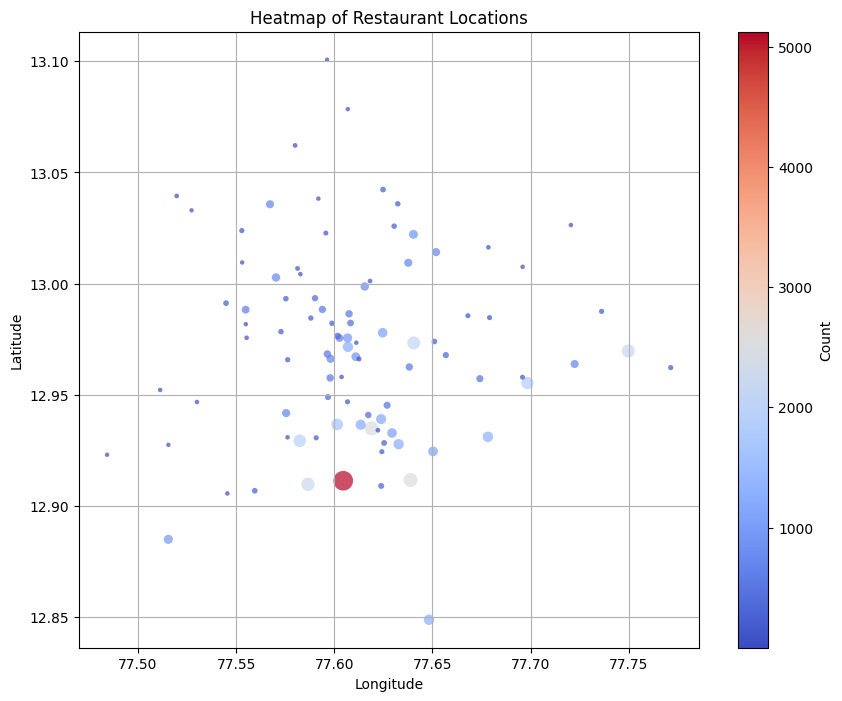

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil data lat, lon, dan count dari DataFrame Beng_rest_locations
latitudes = Beng_rest_locations['lat']
longitudes = Beng_rest_locations['lon']
counts = Beng_rest_locations['count']

# Menentukan rentang nilai untuk warna
value_range = (counts.min(), counts.max())

# Membuat plot heatmap menggunakan seaborn dengan rentang warna yang berbeda
plt.figure(figsize=(10, 8))
sns.scatterplot(x=longitudes, y=latitudes, size=counts, sizes=(10, 200), marker='o', edgecolor='none', alpha=0.7, hue=counts, palette='coolwarm', legend=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Restaurant Locations')
plt.grid(True)

# Menambahkan colorbar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(*value_range))
sm.set_array([])
plt.colorbar(sm, label='Count')

plt.show()


In [ ]:
from folium.plugins import FastMarkerCluster

In [ ]:
basemap = Generate_basemap()

In [ ]:
Beng_rest_locations[['lat', 'lon' , 'count']]

,lat,lon,count
0,12.911276,77.604565,5124
1,12.911623,77.638862,2523
2,12.934843,77.618977,2504
3,12.909694,77.586607,2235
4,12.969637,77.749745,2144
...,...,...,...
88,13.009476,77.553089,6
89,13.100698,77.596345,6
90,13.078474,77.606894,3
91,12.927441,77.515522,2


In [ ]:
FastMarkerCluster(Beng_rest_locations[['lat', 'lon' , 'count']]).add_to(basemap)

In [ ]:
basemap

# **Plotting all the markers**

In [ ]:
Beng_rest_locations

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",5124,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",2523,12.911623,77.638862
2,"Koramangala 5th Block , Bangalore , Karnataka ...",2504,12.934843,77.618977
3,"JP Nagar , Bangalore , Karnataka , India",2235,12.909694,77.586607
4,"Whitefield , Bangalore , Karnataka , India",2144,12.969637,77.749745
...,...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",6,13.009476,77.553089
89,"Yelahanka , Bangalore , Karnataka , India",6,13.100698,77.596345
90,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
91,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2,12.927441,77.515522


In [ ]:
m = Generate_basemap() ## it will generate basemap

In [ ]:
m

In [ ]:
Beng_rest_locations

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",5124,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",2523,12.911623,77.638862
2,"Koramangala 5th Block , Bangalore , Karnataka ...",2504,12.934843,77.618977
3,"JP Nagar , Bangalore , Karnataka , India",2235,12.909694,77.586607
4,"Whitefield , Bangalore , Karnataka , India",2144,12.969637,77.749745
...,...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",6,13.009476,77.553089
89,"Yelahanka , Bangalore , Karnataka , India",6,13.100698,77.596345
90,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
91,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2,12.927441,77.515522


In [ ]:
# Add points to the map

for index , row in Beng_rest_locations.iterrows():
    folium.Marker(location = [row['lat'] , row['lon']] , popup=row['count']).add_to(m)

In [ ]:
m

# **Create Rate for the Restaurant**

In [ ]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore , Karnataka , India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [ ]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51696, dtype: object

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df['rate'].isnull().sum()

7754

In [ ]:
df['rate'].isnull().sum()/len(df)*100 ## ie approximately 15% of your rating belongs to missing values..

14.999226245744351

In [ ]:
df.dropna(subset = ['rate'] , inplace = True)

In [ ]:
df['rate'].isnull().sum()

0

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df.replace('NEW' , '0' , inplace=True)
df.replace('-' , '0' , inplace=True)

## Note:the decision of replacing {"New" -> "0"} & ("-" -> "0") can be changed ,as it depends upon domain expertise & your business analyst..

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df['rating'] = df['rate'].str.replace('/5' ,'') ## replace "/5" with ''

In [ ]:
df['rating']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51709    3.7 
51711    2.5 
51712    3.6 
51715    4.3 
51716    3.4 
Name: rating, Length: 43942, dtype: object

In [ ]:
df['rating'] = df['rating'].astype(float) ## converting its data-type into float

In [ ]:
df['rating'].dtype

dtype('float64')

In [ ]:
df['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

# **The highest rated restaurants**

In [ ]:
df.head(4)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore , Karnataka , India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore , Karnataka , India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7


In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rating'],
      dtype='object')

In [ ]:
grp_df = df.groupby(['location'] , as_index=False).agg({'rating':'mean' , 'name':'size'})

In [ ]:
grp_df.columns = ['Name' , 'avg_rating' , 'count']

In [ ]:
grp_df

,Name,avg_rating,count
0,"BTM , Bangalore , Karnataka , India",3.296128,4261
1,"Banashankari , Bangalore , Karnataka , India",3.373292,805
2,"Banaswadi , Bangalore , Karnataka , India",3.362926,499
3,"Bannerghatta Road , Bangalore , Karnataka , India",3.271677,1324
4,"Basavanagudi , Bangalore , Karnataka , India",3.478185,628
...,...,...,...
87,"West Bangalore , Bangalore , Karnataka , India",2.020000,5
88,"Whitefield , Bangalore , Karnataka , India",3.384170,1693
89,"Wilson Garden , Bangalore , Karnataka , India",3.257635,203
90,"Yelahanka , Bangalore , Karnataka , India",3.640000,5


In [ ]:
grp_df['count']>400

0      True
1      True
2      True
3      True
4      True
      ...  
87    False
88     True
89    False
90    False
91    False
Name: count, Length: 92, dtype: bool

In [ ]:
temp_df = grp_df[grp_df['count']>400]

In [ ]:
temp_df.shape

(35, 3)

In [ ]:
temp_df

,Name,avg_rating,count
0,"BTM , Bangalore , Karnataka , India",3.296128,4261
1,"Banashankari , Bangalore , Karnataka , India",3.373292,805
2,"Banaswadi , Bangalore , Karnataka , India",3.362926,499
3,"Bannerghatta Road , Bangalore , Karnataka , India",3.271677,1324
4,"Basavanagudi , Bangalore , Karnataka , India",3.478185,628
6,"Bellandur , Bangalore , Karnataka , India",3.309833,1078
8,"Brigade Road , Bangalore , Karnataka , India",3.595849,1084
9,"Brookefield , Bangalore , Karnataka , India",3.374699,581
12,"Church Street , Bangalore , Karnataka , India",3.963091,550
15,"Cunningham Road , Bangalore , Karnataka , India",3.901053,475


In [ ]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.884924,77.515485
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [ ]:
Ratings_locations = temp_df.merge(rest_loc , on='Name')

In [ ]:
Ratings_locations

,Name,avg_rating,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",3.296128,4261,12.911276,77.604565
1,"Banashankari , Bangalore , Karnataka , India",3.373292,805,12.884924,77.515485
2,"Banaswadi , Bangalore , Karnataka , India",3.362926,499,13.014162,77.651854
3,"Bannerghatta Road , Bangalore , Karnataka , India",3.271677,1324,12.936629,77.601471
4,"Basavanagudi , Bangalore , Karnataka , India",3.478185,628,12.941726,77.575502
5,"Bellandur , Bangalore , Karnataka , India",3.309833,1078,12.931032,77.678247
6,"Brigade Road , Bangalore , Karnataka , India",3.595849,1084,12.971485,77.606966
7,"Brookefield , Bangalore , Karnataka , India",3.374699,581,12.963814,77.722437
8,"Church Street , Bangalore , Karnataka , India",3.963091,550,12.975511,77.602677
9,"Cunningham Road , Bangalore , Karnataka , India",3.901053,475,12.988359,77.593955


In [ ]:
basemap = Generate_basemap()

In [ ]:
HeatMap(Ratings_locations[['lat', 'lon' , 'avg_rating']]).add_to(basemap)

In [ ]:
basemap